In [2]:
pip install pandas scikit-learn wordcloud matplotlib nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

Matplotlib is building the font cache; this may take a moment.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
# Load dataset
df = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')

# Preview dataset
print(df.head())

   Id Sentiment                             Instagram Comment Text
0   1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1   2  negative  Geblek lo tata...cowo bgt dibela2in balikan......
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...
3   4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...
4   5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...


In [27]:
print(df.columns)

Index(['Id', 'Sentiment', 'Instagram Comment Text'], dtype='object')


In [28]:
# Preprocessing
def preprocess_text(text):
    # Remove hashtags, mentions, and URLs
    text = re.sub(r'(@\w+|#\w+|http\S+)', '', text)
    # Remove non-alphabet characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('indonesian'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [29]:
# Apply preprocessing to the 'Instagram Comment Text' column
df['Komentar'] = df['Instagram Comment Text'].apply(preprocess_text)

In [30]:
def label_comment(text):
    negative_words = ["jelek", "pelakor", "benci", "marah","menyedihkan"]
    positive_words = ["baik", "bagus", "cantik", "keren","bahagia"]
    if any(word in text for word in negative_words):
        return 0
    elif any(word in text for word in positive_words):
        return 1
    else:
        return 0

In [31]:
# Apply labelling to the cleaned comments
df['label'] = df['Komentar'].apply(label_comment)

In [32]:
# Save the labeled dataset to a new CSV file
df.to_csv('labeled_dataset_komentar_instagram_cyberbullying.csv', index=False)

# Display the first few rows of the labeled dataset
print(df.head())

   Id Sentiment                             Instagram Comment Text  \
0   1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...   
1   2  negative  Geblek lo tata...cowo bgt dibela2in balikan......   
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...   
3   4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...   
4   5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...   

                                            Komentar  label  
0  username tolol gak hubungan nya keguguran dgn ...      0  
1  geblek lo tatacowo bgt dibelain balikanhadewwn...      0  
2  kmrn termewek skr lengket lg duhhh labil bgt s...      0  
3  intinya kesel att nya gausah anaknya kasian pe...      0  
4  hadewwwww permpuan lgsakit jiwaknp yg jd peran...      0  


In [33]:
print(df)

      Id Sentiment                             Instagram Comment Text  \
0      1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...   
1      2  negative  Geblek lo tata...cowo bgt dibela2in balikan......   
2      3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...   
3      4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...   
4      5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...   
..   ...       ...                                                ...   
395  396  positive  Bangga sama suami yg selalu ingat istri disela...   
396  397  positive  Apaoun pekerjaannya yg penting halal u tuk men...   
397  398  positive  Gojek itu mayoritas pegangguran yang lama gak ...   
398  399  positive   <USERNAME> aslinya cantik dan ayu loh mbak kr...   
399  400  positive   <USERNAME> suami saya seumuran sama saya mba,...   

                                              Komentar  label  
0    username tolol gak hubungan nya keguguran dgn ...     

In [35]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Komentar']).toarray()

# Assuming the dataset has a 'label' column for supervised learning
y = df['Sentiment']

In [36]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Model training and evaluation with SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.84      0.90        44
    positive       0.83      0.97      0.90        36

    accuracy                           0.90        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80

SVM Accuracy: 0.9


In [38]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.86      0.90        44
    positive       0.85      0.94      0.89        36

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

Naive Bayes Accuracy: 0.9


In [40]:
# Visualization with Word Cloud
# Combine all comments for the word cloud
all_comments = ' '.join(df['Komentar'])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

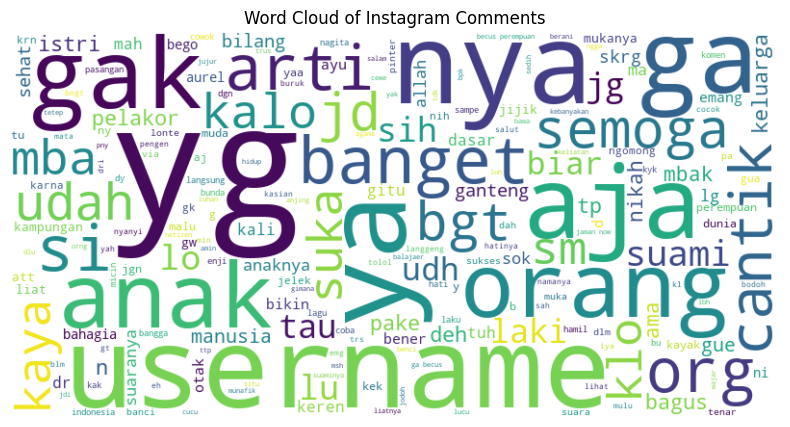

In [41]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Instagram Comments')
plt.show()

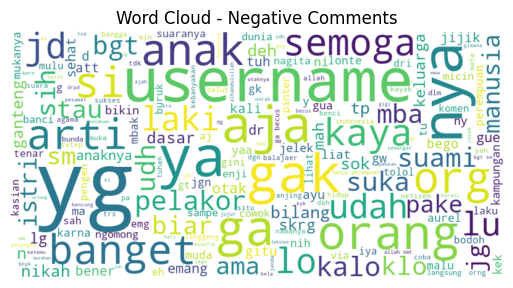

In [43]:
# Separate comments by label
negative_comments = ' '.join(df[df['label'] == 0]['Komentar'])

# Generate word clouds
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)

# Plot the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Comments')

plt.show()

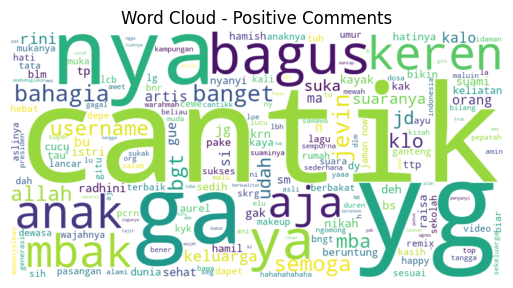

In [44]:
# Separate comments by label
positive_comments = ' '.join(df[df['label'] == 1]['Komentar'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

# Plot the word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Comments')

plt.show()

In [45]:
import pickle

In [46]:
filename = 'komen_instagram.sav'
with open(filename, 'wb') as model_file:
    pickle.dump(nb_model, model_file)

In [48]:
# Save the models and vectorizer
with open('komen_instagram_nb.sav', 'wb') as nb_file, open('komen_instagram_svm.sav', 'wb') as svm_file, open('tfidf_vectorizer.sav', 'wb') as vec_file:
    pickle.dump(nb_model, nb_file)
    pickle.dump(svm_model, svm_file)
    pickle.dump(vectorizer, vec_file)